In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,LeakyReLU
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K 
import keras
from keras.utils import to_categorical
import talos

In [3]:
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
    return 100. * K.mean(diff, axis=-1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [4]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
def normal(lt):
    for i in lt.columns:
        if((i == 'S1') or (i == 'CLASS')):
            continue
        lt[i] = (lt[i] - lt[i].min())/(lt[i] - lt[i].min()).max()
    return lt

In [6]:
poker = pd.read_csv('poker-hand-testing.data', low_memory=False)
poker.columns = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','CLASS']

In [7]:
labelencoder = LabelEncoder()
poker['S1'] = labelencoder.fit_transform(poker['S1'])

In [8]:
regression_y = poker['CLASS']
regression_x = poker.drop(columns=['CLASS'])

In [9]:
train_rx, test_rx, train_ry, test_ry = train_test_split(regression_x, regression_y,
                                                    test_size=0.33, 
                                                    random_state=0)
test_ry = test_ry.values
test_ry = [float(test_ry[i]) for i in range(len(test_ry))]

In [10]:
classification_y = poker['S1']
classification_x = poker.drop(columns=['S1'])
train_cx, test_cx, train_cy, test_cy = train_test_split(classification_x, classification_y,
                                                    test_size=0.33, 
                                                    random_state=0)

In [11]:
test_cy = test_cy.values
test_cy = [float(test_cy[i]) for i in range(len(test_cy))]

In [12]:
def talos_regression_best(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='relu'))
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(loss = 'mse', optimizer = params['optimizer'], metrics = ['mae'])
    out = model.fit(x_train, y_train,
                              epochs=params['epochs'],  
                              batch_size=params['batch_size'],
                              validation_split=0.1)
    return out,model

def build_regression_model(x, y):
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='relu'))
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(loss = 'mae', optimizer = 'SGD', metrics = ['mae'])
    model_result = model.fit(x, y,
                              epochs=200,  
                              batch_size=32,
                              validation_split=0.1)
    loss,mae = model.evaluate(x, y, verbose=1)
    print(mae)
    print('Test loss:', loss)
    print('Test accuracy:', mae)
    plt.plot(model_result.history['loss'])
    plt.plot(model_result.history['mae'])
    plt.plot(model_result.history['val_loss'])
    plt.plot(model_result.history['val_mae'])
    plt.title('model accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'mae','val_loss', 'val_mae'], loc='upper left') 
    plt.show()
    return model

Epoch 1/200
18844/18844 [==============================] - 25s 1ms/step - loss: 0.2307 - mae: 0.2307 - val_loss: 0.3065 - val_mae: 0.3065
Epoch 2/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0588 - mae: 0.0588 - val_loss: 0.3284 - val_mae: 0.3284
Epoch 3/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0436 - mae: 0.0436 - val_loss: 0.3610 - val_mae: 0.3610
Epoch 4/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0378 - mae: 0.0378 - val_loss: 0.4032 - val_mae: 0.4032
Epoch 5/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0342 - mae: 0.0342 - val_loss: 0.3370 - val_mae: 0.3370
Epoch 6/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0315 - mae: 0.0315 - val_loss: 0.3716 - val_mae: 0.3716
Epoch 7/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0298 - mae: 0.0298 - val_loss: 0.3437 - val_mae: 0.3437
Epoch 8/200
18844/18844 [=========

18844/18844 [==============================] - 23s 1ms/step - loss: 0.0110 - mae: 0.0110 - val_loss: 0.1464 - val_mae: 0.1464
Epoch 61/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0108 - mae: 0.0108 - val_loss: 0.1478 - val_mae: 0.1478
Epoch 62/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0109 - mae: 0.0109 - val_loss: 0.1541 - val_mae: 0.1541
Epoch 63/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0107 - mae: 0.0107 - val_loss: 0.1513 - val_mae: 0.1513
Epoch 64/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0105 - mae: 0.0105 - val_loss: 0.1378 - val_mae: 0.1378
Epoch 65/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0106 - mae: 0.0106 - val_loss: 0.1418 - val_mae: 0.1418
Epoch 66/200
18844/18844 [==============================] - 21s 1ms/step - loss: 0.0106 - mae: 0.0106 - val_loss: 0.1421 - val_mae: 0.1421
Epoch 67/200
18844/18844 [==============

Epoch 119/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0091 - mae: 0.0091 - val_loss: 0.1408 - val_mae: 0.1408
Epoch 120/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0090 - mae: 0.0090 - val_loss: 0.1394 - val_mae: 0.1394
Epoch 121/200
18844/18844 [==============================] - 21s 1ms/step - loss: 0.0088 - mae: 0.0088 - val_loss: 0.1373 - val_mae: 0.1373
Epoch 122/200
18844/18844 [==============================] - 21s 1ms/step - loss: 0.0088 - mae: 0.0088 - val_loss: 0.1404 - val_mae: 0.1404
Epoch 123/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.1462 - val_mae: 0.1462
Epoch 124/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0090 - mae: 0.0090 - val_loss: 0.1377 - val_mae: 0.1377
Epoch 125/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0088 - mae: 0.0088 - val_loss: 0.1347 - val_mae: 0.1347
Epoch 126/200
18844/

18844/18844 [==============================] - 23s 1ms/step - loss: 0.0086 - mae: 0.0086 - val_loss: 0.1375 - val_mae: 0.1375
Epoch 178/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0085 - mae: 0.0085 - val_loss: 0.1430 - val_mae: 0.1430
Epoch 179/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0086 - mae: 0.0086 - val_loss: 0.1436 - val_mae: 0.1436
Epoch 180/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0085 - mae: 0.0085 - val_loss: 0.1342 - val_mae: 0.1342
Epoch 181/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0085 - mae: 0.0085 - val_loss: 0.1392 - val_mae: 0.1392
Epoch 182/200
18844/18844 [==============================] - 23s 1ms/step - loss: 0.0085 - mae: 0.0085 - val_loss: 0.1402 - val_mae: 0.1402
Epoch 183/200
18844/18844 [==============================] - 22s 1ms/step - loss: 0.0085 - mae: 0.0085 - val_loss: 0.1310 - val_mae: 0.1310
Epoch 184/200
18844/18844 [=======

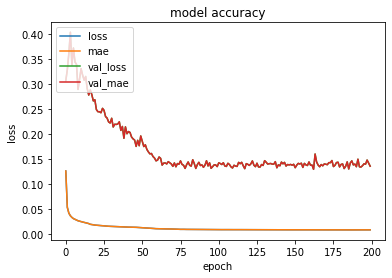

In [13]:
modelr = build_regression_model(train_rx, train_ry)

In [14]:
#預測test
pred_ry = modelr.predict(test_rx)
pred_ry = pred_ry.flatten()
#預測train
pred_train_ry = modelr.predict(train_rx)
pred_train_ry = pred_train_ry.flatten()

In [15]:
rain_ry2 = train_ry.copy()
train_ry2 = train_ry.values
train_ry2 = [float(train_ry2[i]) for i in range(len(train_ry2))]
#數值預測指標結果
mae = mean_absolute_error(test_ry, pred_ry)
mape = mean_absolute_percentage_error(test_ry, pred_ry)
rmse = root_mean_squared_error(test_ry, pred_ry)
print(f'test predict: mae:{mae}, mape:{mape}, rmse:{rmse}')

test predict: mae:0.1370821365811608, mape:4.692718505859375, rmse:0.26775387100572307


In [16]:
mae_train = mean_absolute_error(train_ry2, pred_train_ry)
mape_train = mean_absolute_percentage_error(train_ry2, pred_train_ry)
rmse_train = root_mean_squared_error(train_ry2, pred_train_ry)
print(f'train predict: mae:{mae_train}, mape:{mape_train}, rmse:{rmse_train}')

train predict: mae:0.13652364402152398, mape:4.674554824829102, rmse:0.26718990148744665


In [22]:
def talos_best(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss=keras.losses.categorical_crossentropy,
    optimizer=params['optimizer'], metrics = ['accuracy',recall_m,precision_m,f1_m])

    out = model.fit(x_train, y_train,
                              epochs=params['epochs'],  
                              batch_size=params['batch_size'],
                              validation_data=(x_val, y_val))
    return out,model

#預測結果模型
def build_classification_model(x, y):
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='relu'))
#     sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001), metrics = ['accuracy',recall_m,precision_m,f1_m])

    
    model_result = model.fit(x, y,
                              epochs=200,  
                              batch_size=32,
                              validation_split=0.33)
    score = model.evaluate(x, y, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    plt.plot(model_result.history['accuracy'])
    plt.plot(model_result.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left') 
    plt.show()
    return model

In [23]:
test_cy = to_categorical(test_cy)
train_cy = to_categorical(train_cy)

classification_y =  to_categorical(classification_y)

Epoch 1/200
14029/14029 [==============================] - 32s 2ms/step - loss: nan - accuracy: 0.2490 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 2/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2499 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 3/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2494 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 4/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2513 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 5/

Epoch 34/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2501 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 35/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2494 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 36/200
14029/14029 [==============================] - 26s 2ms/step - loss: nan - accuracy: 0.2499 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 37/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2499 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoc

Epoch 67/200
14029/14029 [==============================] - 26s 2ms/step - loss: nan - accuracy: 0.2498 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 68/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2496 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 69/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2500 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 70/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2502 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoc

Epoch 100/200
14029/14029 [==============================] - 26s 2ms/step - loss: nan - accuracy: 0.2498 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 101/200
14029/14029 [==============================] - 26s 2ms/step - loss: nan - accuracy: 0.2508 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 102/200
14029/14029 [==============================] - 26s 2ms/step - loss: nan - accuracy: 0.2493 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 103/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2483 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan


Epoch 133/200
14029/14029 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.2497 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 134/200
14029/14029 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.2497 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 135/200
14029/14029 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.2486 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 136/200
14029/14029 [==============================] - 29s 2ms/step - loss: nan - accuracy: 0.2493 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan


Epoch 166/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2478 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 167/200
14029/14029 [==============================] - 27s 2ms/step - loss: nan - accuracy: 0.2484 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 168/200
14029/14029 [==============================] - 28s 2ms/step - loss: nan - accuracy: 0.2493 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 169/200
14029/14029 [==============================] - 28s 2ms/step - loss: nan - accuracy: 0.2494 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan


Epoch 199/200
14029/14029 [==============================] - 30s 2ms/step - loss: nan - accuracy: 0.2505 - recall_m: nan - precision_m: nan - f1_m: nan - val_loss: nan - val_accuracy: 0.2507 - val_recall_m: nan - val_precision_m: nan - val_f1_m: nan
Epoch 200/200
20938/20938 [==============================] - 22s 876us/step - loss: nan - accuracy: 0.2499 - recall_m: nan - precision_m: nan - f1_m: nan
Test loss: 0.24992425739765167
Test accuracy: nan


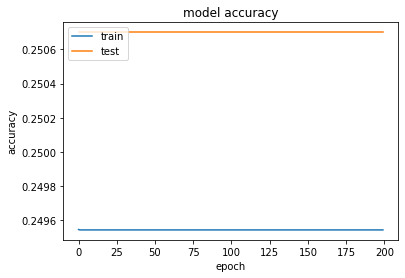

In [24]:
modelr = build_classification_model(train_rx, train_ry)